<a href="https://colab.research.google.com/github/Naman2827/hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hba_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project/EDA/Hotel Bookings.csv")
hba = hba_data.copy(deep=True)
hba_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hba_data.info()
hba_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
#Detecting and droping the duplicate value
hba.duplicated().sum()
hba.drop_duplicates(inplace=True)
hba.info()

# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time

filter = (hba.children == 0) & (hba.adults == 0) & (hba.babies == 0)
hba[filter]
hba = hba[~filter]
hba

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#Detecting and replacing the NaN value
hba.isnull().sum()
hba["country"].fillna(0)
print(hba["country"].unique())

['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY'
 'MLI' 'NAM' 'BOL' 'PRY' 'BRB' 'ABW' 'AIA' 'SLV' 'DMA'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


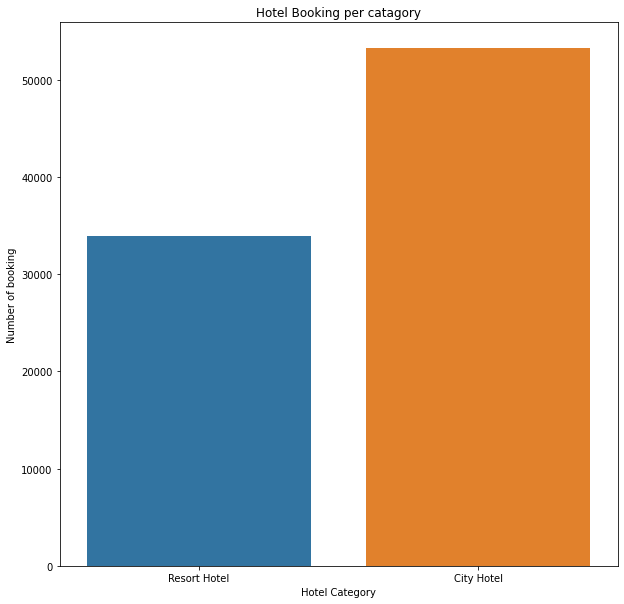

In [ ]:
#Ploting the chart of the hotel category and booking
sns.countplot(hba["hotel"])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title("Hotel Booking per catagory")
plt.xlabel('Hotel Category');
plt.ylabel('Number of booking');


Text(0.5, 1.0, 'Numbers of vistors in a country')

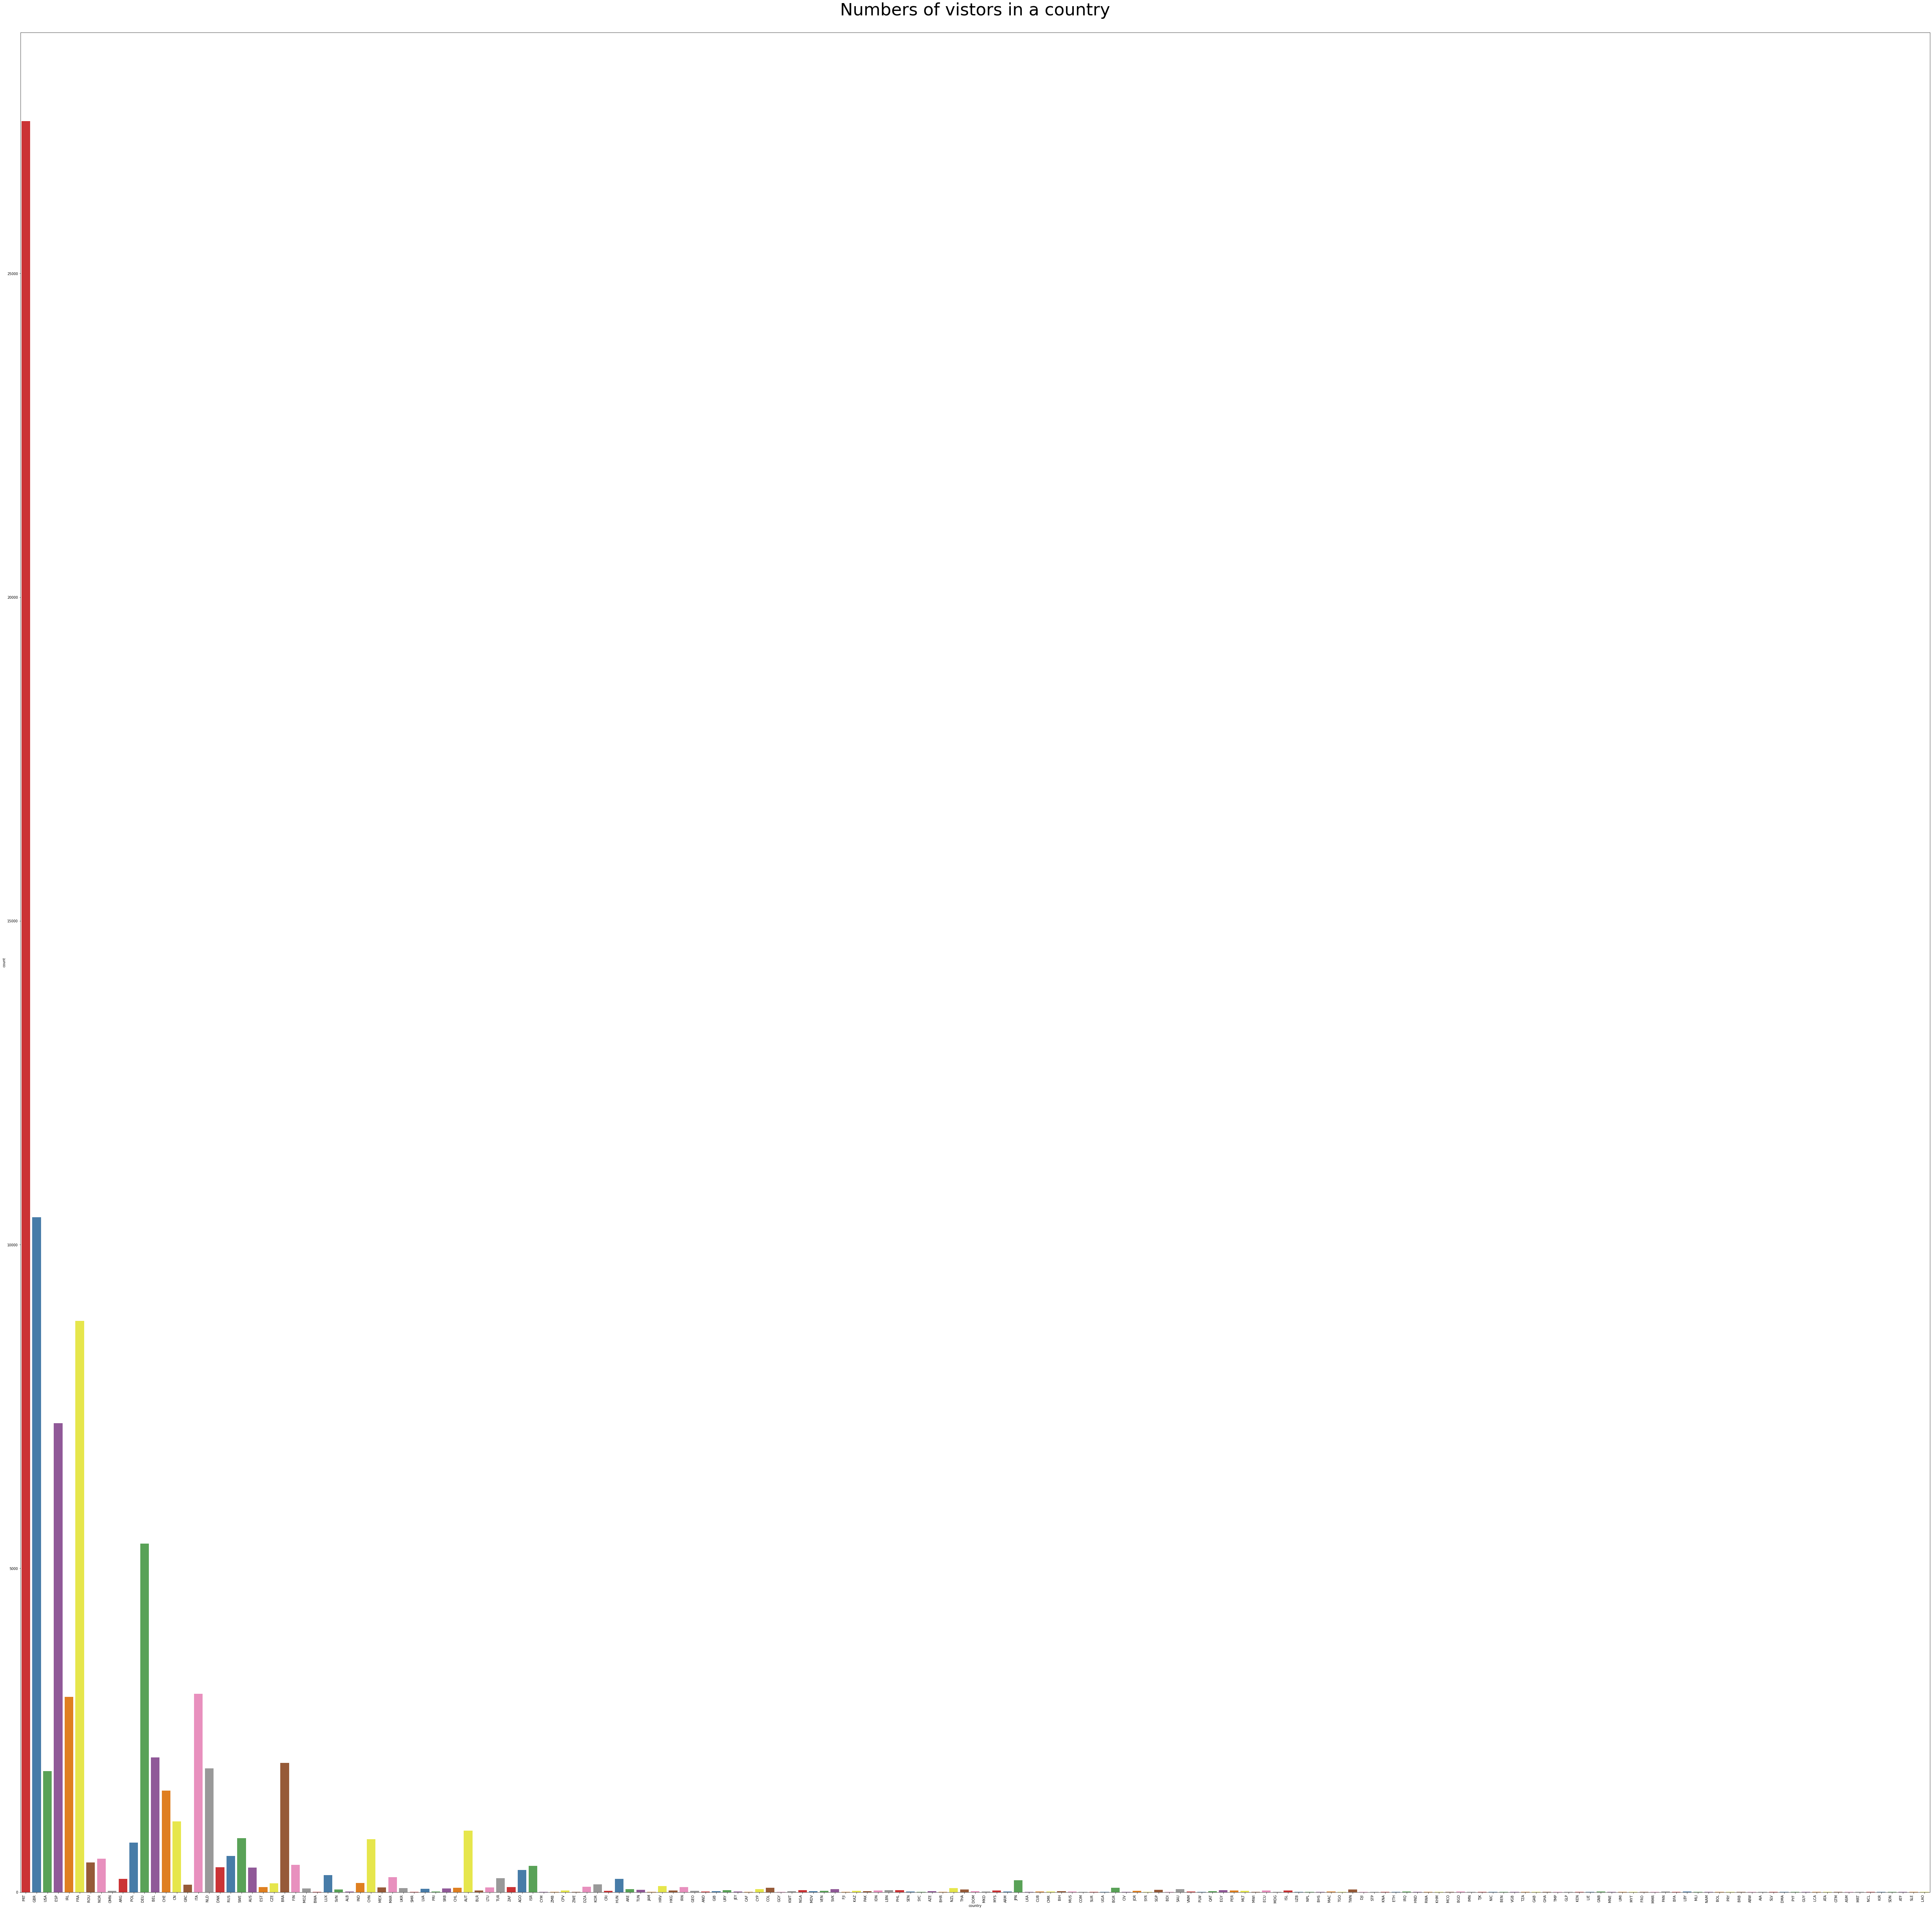

In [ ]:
#Guest from the countries
fig = plt.figure(figsize=(100,100))
loc = sns.countplot(x=hba["country"],data=hba,palette="Set1")
loc.set_xticklabels(loc.get_xticklabels(),rotation=90,ha="right")
plt.title("Numbers of vistors in a country",size=50,pad=50)



In [ ]:
#Ploting booking details as per month 
#fig = plt.figure(figsize=(20,20))
print(hba.loc[hba['hotel'] == 'Resort Hotel'])
print(hba['reservation_status'].unique())
#plt.plot(hba['arrival_date_month'],hba.loc[hba['hotel'] == 'Resort Hotel'],'b-x', linewidth=4, markersize=12, markeredgewidth=4, markeredgecolor='navy')
#plt.plot(hba["arrival_date_month"],hba[["hotel"]=="City Hotel"],'r--o', linewidth=4, markersize=12,)

              hotel  is_canceled  ...  reservation_status  reservation_status_date
0      Resort Hotel            0  ...           Check-Out               2015-07-01
1      Resort Hotel            0  ...           Check-Out               2015-07-01
2      Resort Hotel            0  ...           Check-Out               2015-07-02
3      Resort Hotel            0  ...           Check-Out               2015-07-02
4      Resort Hotel            0  ...           Check-Out               2015-07-03
...             ...          ...  ...                 ...                      ...
40055  Resort Hotel            0  ...           Check-Out               2017-09-10
40056  Resort Hotel            0  ...           Check-Out               2017-09-10
40057  Resort Hotel            0  ...           Check-Out               2017-09-12
40058  Resort Hotel            0  ...           Check-Out               2017-09-14
40059  Resort Hotel            0  ...           Check-Out               2017-09-14

[33

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


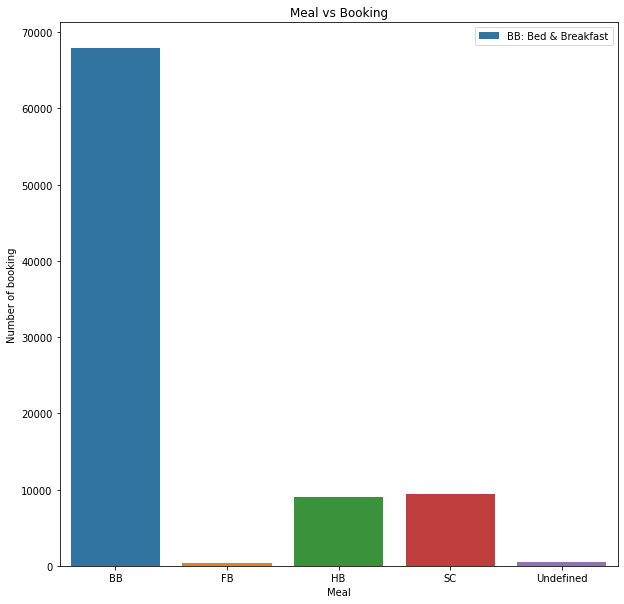

In [ ]:
#Meals prefrences
sns.countplot(hba['meal'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title("Meal vs Booking")
plt.xlabel('Meal');
plt.ylabel('Number of booking');
plt.legend(['BB: Bed & Breakfast', "HB: Half Board (Breakfast and Dinner normally)","FB: Full Board (Beakfast, Lunch and Dinner)"]);



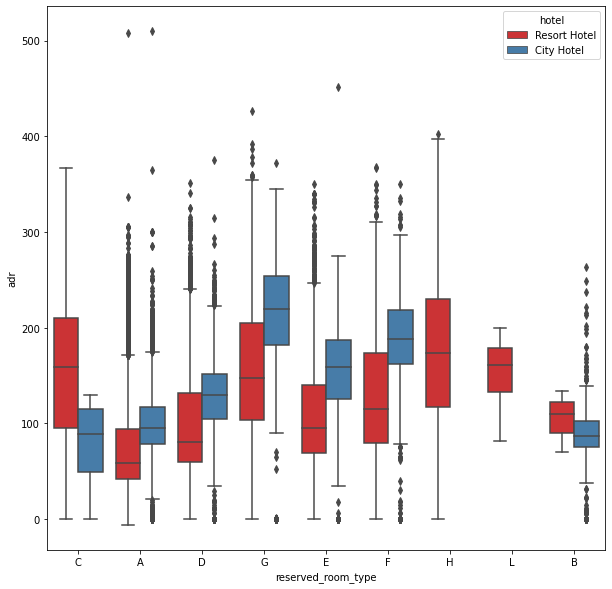

In [167]:
#How much do guests pay for a room per night?
data = hba[hba['is_canceled'] == 0]
sns.boxplot(x = 'reserved_room_type', y='adr',hue='hotel',data=data,palette='Set1')
fig = plt.gcf()
fig.set_size_inches(10,10)



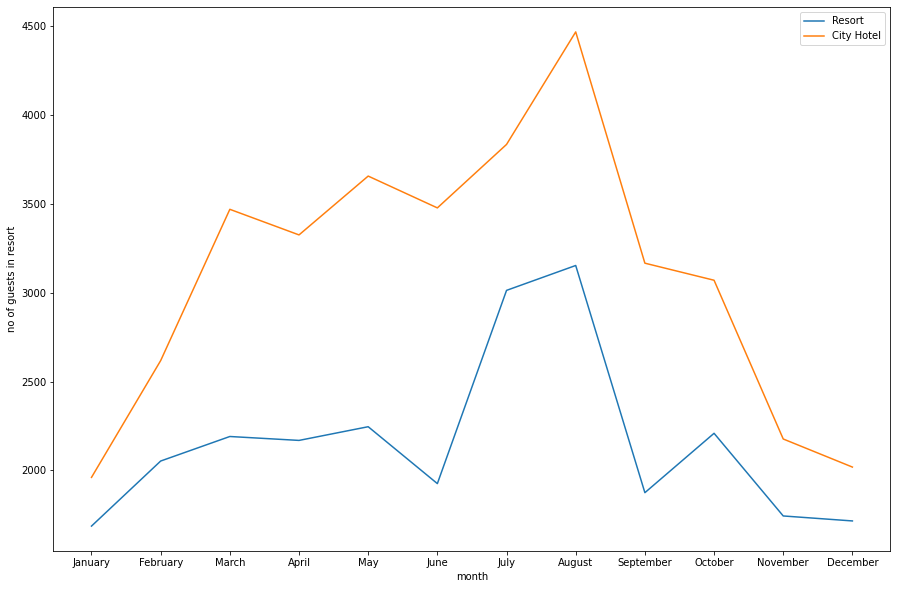

In [ ]:
#Which are the most busy months?
d_month = hba['arrival_date_month'].value_counts().reset_index()
d_month.columns=['months','Number of guests']
d_month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
d_month['months'] = pd.Categorical(d_month['months'], categories=months, ordered=True)
d_month.sort_values('months').reset_index()


data_resort = hba[(hba['hotel'] == 'Resort Hotel') & (hba['is_canceled'] == 0)]
data_city = hba[(hba['hotel'] == 'City Hotel') & (hba['is_canceled'] == 0)]
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

resort_guest = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guest.columns=['month','no of guests']
resort_guest

city_guest = data_city['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest

final_guest=resort_guest.merge(city_guest, on = 'month')
final_guest.columns=['month','no of guests in resort','no of guest in city hotel']
final_guest
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)
final_guest = final_guest.sort_values('month').reset_index()

#Which month get most visitors?
sns.lineplot(data=final_guest, x='month', y='no of guests in resort')
sns.lineplot(data=final_guest, x='month', y='no of guest in city hotel')
plt.legend(['Resort','City Hotel'])
fig = plt.gcf()
fig.set_size_inches(15,10)




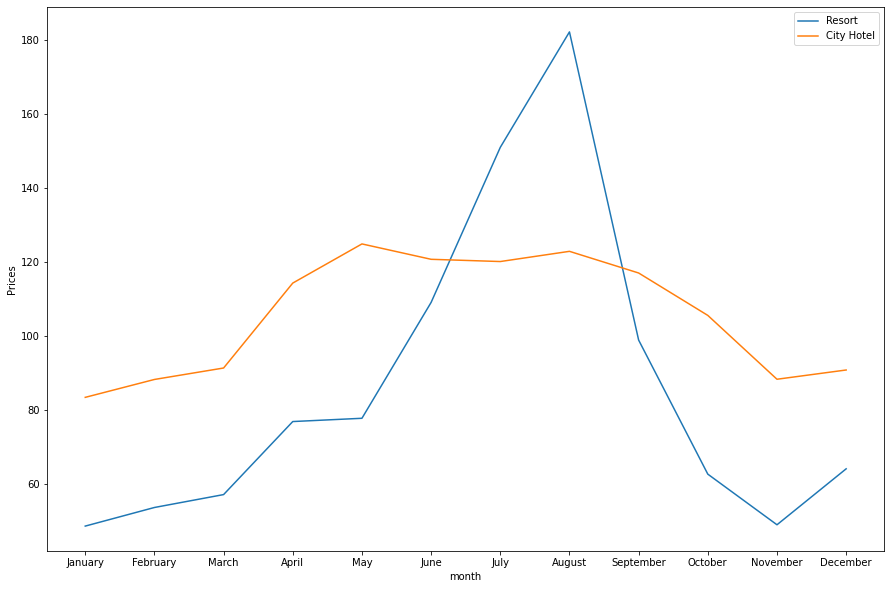

In [ ]:
final_hotel['month'] = pd.Categorical(final_hotel['month'], categories=months, ordered=True)
final_hotel.sort_values('month').reset_index()

sns.lineplot(data=final_hotel, x='month', y='price_for_resort')
sns.lineplot(data=final_hotel, x='month', y='price_for_city_hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Prices')
fig = plt.gcf()
fig.set_size_inches(15,10)


([<matplotlib.patches.Wedge at 0x7faf3d308c90>,
 [Text(-1.030529848330374, 0.7924697039636133, 'TA/TO'),
  Text(0.7968787973493466, -0.8972091073629711, 'Direct'),
  Text(1.569457082366219, -0.31113416175424313, 'Corporate'),
  Text(1.1999716090138122, -0.00825454788603388, 'GDS'),
  Text(1.099999988170999, -0.0001980499993020483, 'Undefined')],
 [Text(-0.6341722143571531, 0.48767366397760814, '79.1%'),
  Text(0.4648459651204522, -0.5233719792950664, '14.9%'),
  Text(1.0790017441267756, -0.2139047362060421, '5.8%'),
  Text(0.6999834385913904, -0.004815152933519762, '0.2%'),
  Text(0.5999999962750903, -0.00010802727283760483, '0.0%')])

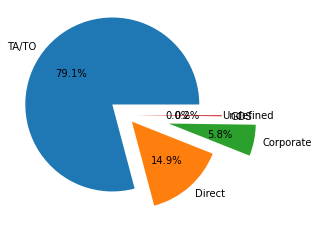

In [ ]:
#Distrubution Channel
d_c = hba['distribution_channel'].value_counts().reset_index()
d_c.columns=['disctibution_channel','value']
plt.pie(d_c['value'],explode=[0.2,0.1,0.5,0.1,0.000000006], autopct="%.1f%%",labels= d_c['disctibution_channel'])


In [ ]:
#the optimal length of stay in order to get the best daily rate?
